In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df     = pd.read_csv('data/COVID_merged.csv', index_col=0,parse_dates=True)
df_alt = pd.read_csv('data/sociality_variations.csv', index_col=0, parse_dates=True)
# Define 4 breakpoints for mobility
bps=[df.index.min(),'2020-05-18','2021-05-17','2021-09-15',df.index.max()]
# Convert to datetime
bps=pd.to_datetime(bps)

# Create a period columns, defined through the breakpoints
df['Period']=pd.cut(df.index,bins=bps,labels=['1','2','3','4'],include_lowest=True)
print(df.head(3))


                 mobility  m_smoothed  m_norm  sociality  sociality75pc  \
2020-01-01  132326.208333         NaN     NaN        1.0            1.0   
2020-01-02  171437.750000         NaN     NaN        NaN            NaN   
2020-01-03  183446.666667         NaN     NaN        NaN            NaN   

            shifted_sociality  shifted_sociality75pc Period  
2020-01-01                1.0                    1.0      1  
2020-01-02                NaN                    NaN      1  
2020-01-03                NaN                    NaN      1  


In [20]:
(df['shifted_sociality']-df['sociality']).drop_duplicates(keep='last')

2020-05-19    0.000000
2020-09-15    0.577593
2021-04-13    0.577593
2021-04-27    0.577593
2021-07-29    0.231363
2021-09-02    0.231363
2022-03-21    0.706065
2022-06-19    0.706065
2022-06-29    0.706065
2022-06-30         NaN
dtype: float64

In [31]:
# For each period, compute the average difference between m_norm and m_smoothed
# NdC questo commento è sbagliato, ma il codice fa la cosa giusta, non so se volutamente
# aggiungo a desso gli shift per l'affidabilità al 75%

df['shift']=df['shifted_sociality']-df['sociality']
df_shifts=df.groupby('Period')['shift'].mean()
print(df_shifts)

df['shift75pc']=df['shifted_sociality75pc']-df['sociality75pc']
df_shifts75pc=df.groupby('Period')['shift75pc'].mean()
print(df_shifts75pc)

Period
1    0.000000
2    0.539087
3    0.231363
4    0.706065
Name: shift, dtype: float64
Period
1    0.000000
2    0.539087
3    0.431363
4    0.736065
Name: shift75pc, dtype: float64


In [5]:
df['Period'].drop_duplicates(keep='first')

2020-01-01    1
2020-05-19    2
2021-05-18    3
2021-09-16    4
Name: Period, dtype: category
Categories (4, object): ['1' < '2' < '3' < '4']

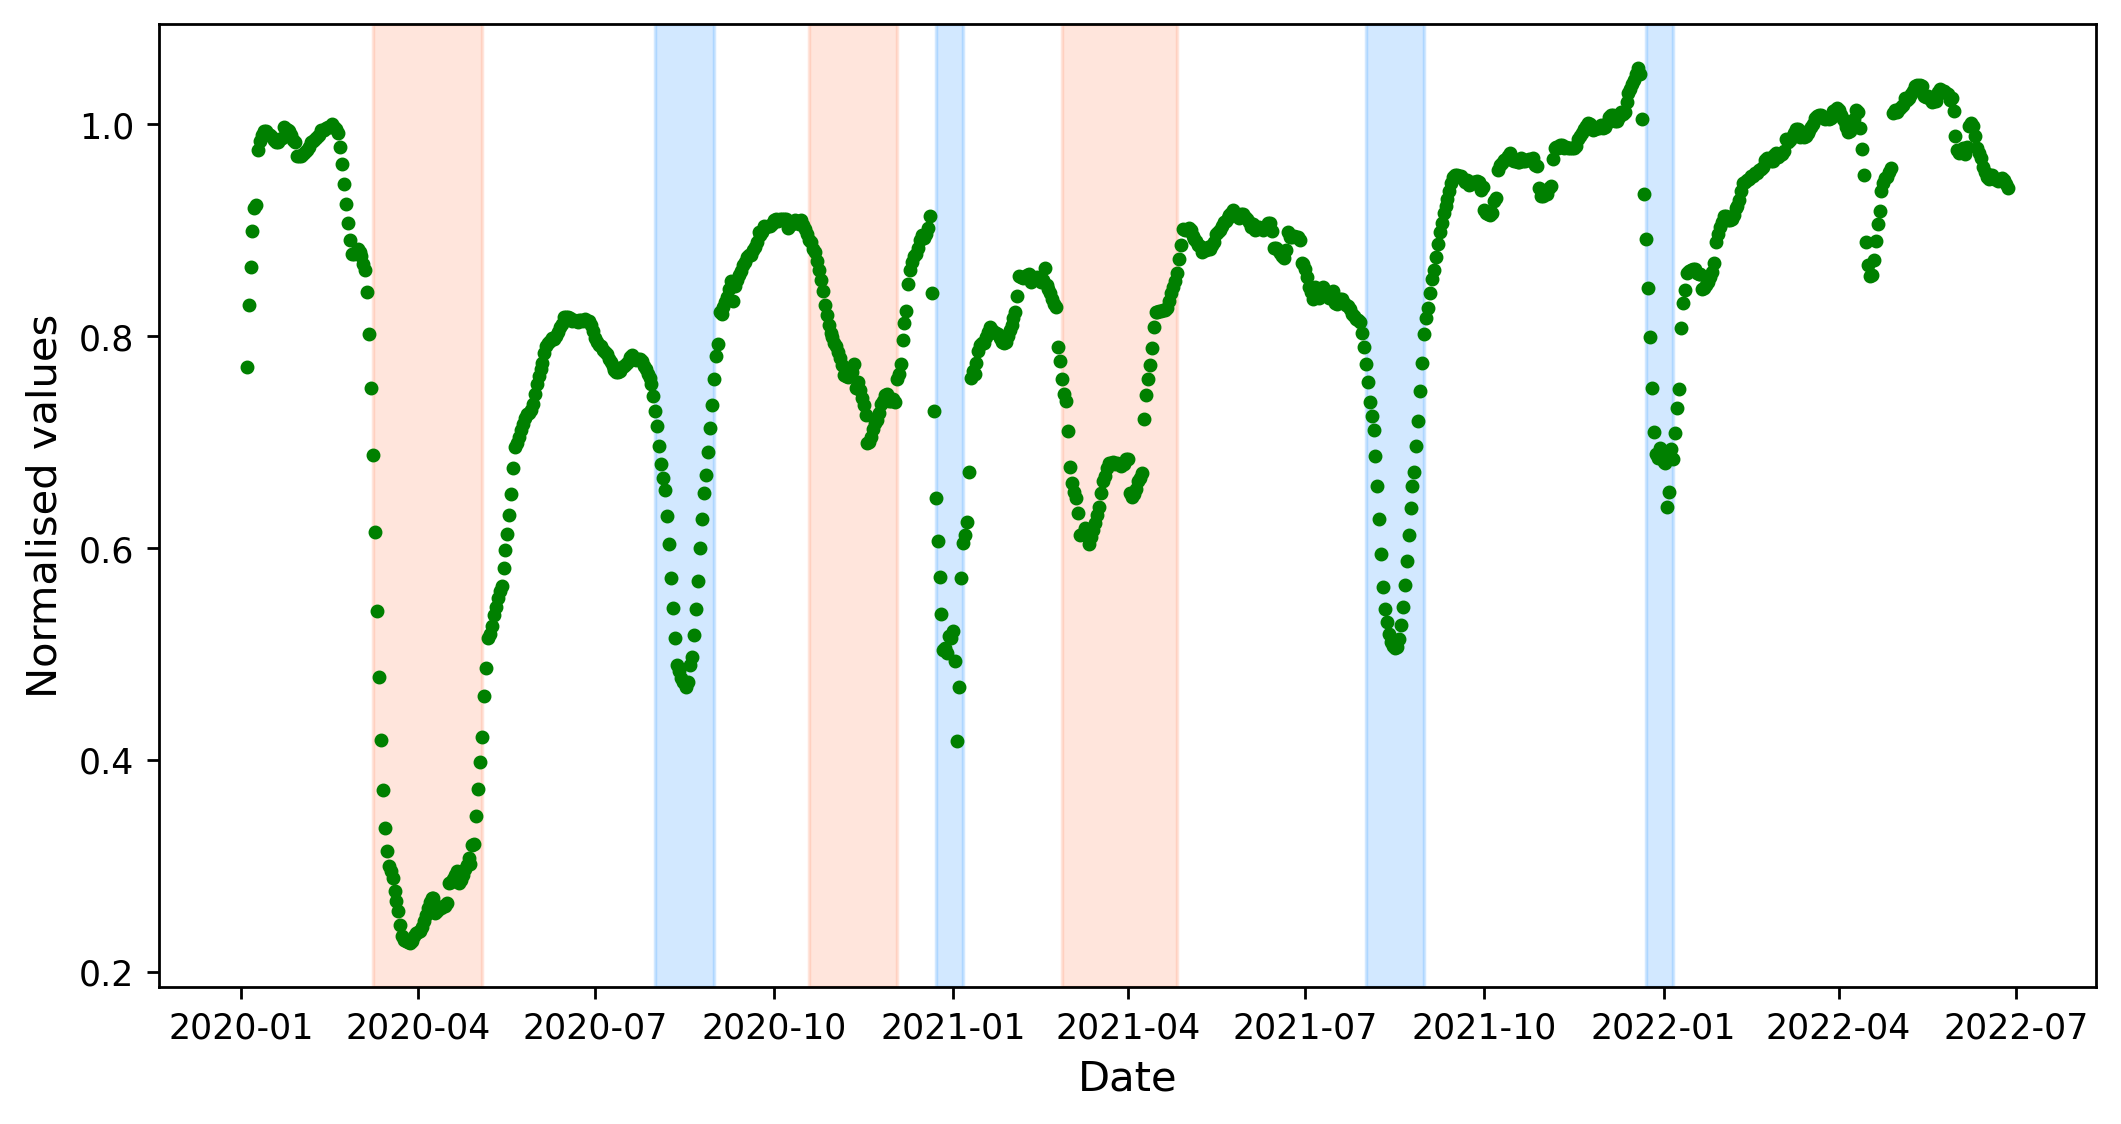

In [6]:
# Plot m_norm and shifted_sociality over time using matplotlib
fig, ax = plt.subplots(figsize=(10,5),dpi=250)
# Plot green dots for m_norm column
ax.plot(df.index, df['m_norm'], 'go', label='Mobility',markersize=3)

# Draw a different area for each period except the first one
ax.axvspan(pd.to_datetime('2020-03-09'),pd.to_datetime('2020-05-04'),alpha=0.2,color='coral')
ax.axvspan(pd.to_datetime('2020-10-19'),pd.to_datetime('2020-12-03'),alpha=0.2,color='coral')
ax.axvspan(pd.to_datetime('2021-02-26'),pd.to_datetime('2021-04-26'),alpha=0.2,color='coral')

ax.axvspan(pd.to_datetime('2020-08-01'),pd.to_datetime('2020-08-31'),alpha=0.2,color='dodgerblue')
ax.axvspan(pd.to_datetime('2020-12-23'),pd.to_datetime('2021-01-06'),alpha=0.2,color='dodgerblue')
ax.axvspan(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-08-31'),alpha=0.2,color='dodgerblue')
ax.axvspan(pd.to_datetime('2021-12-23'),pd.to_datetime('2022-01-06'),alpha=0.2,color='dodgerblue')

#ax.legend(loc='lower right',fontsize=8)


ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Normalised values', fontsize = 12)
fig.savefig('images/mob.pdf', transparent = True, bbox_inches='tight',dpi=300)


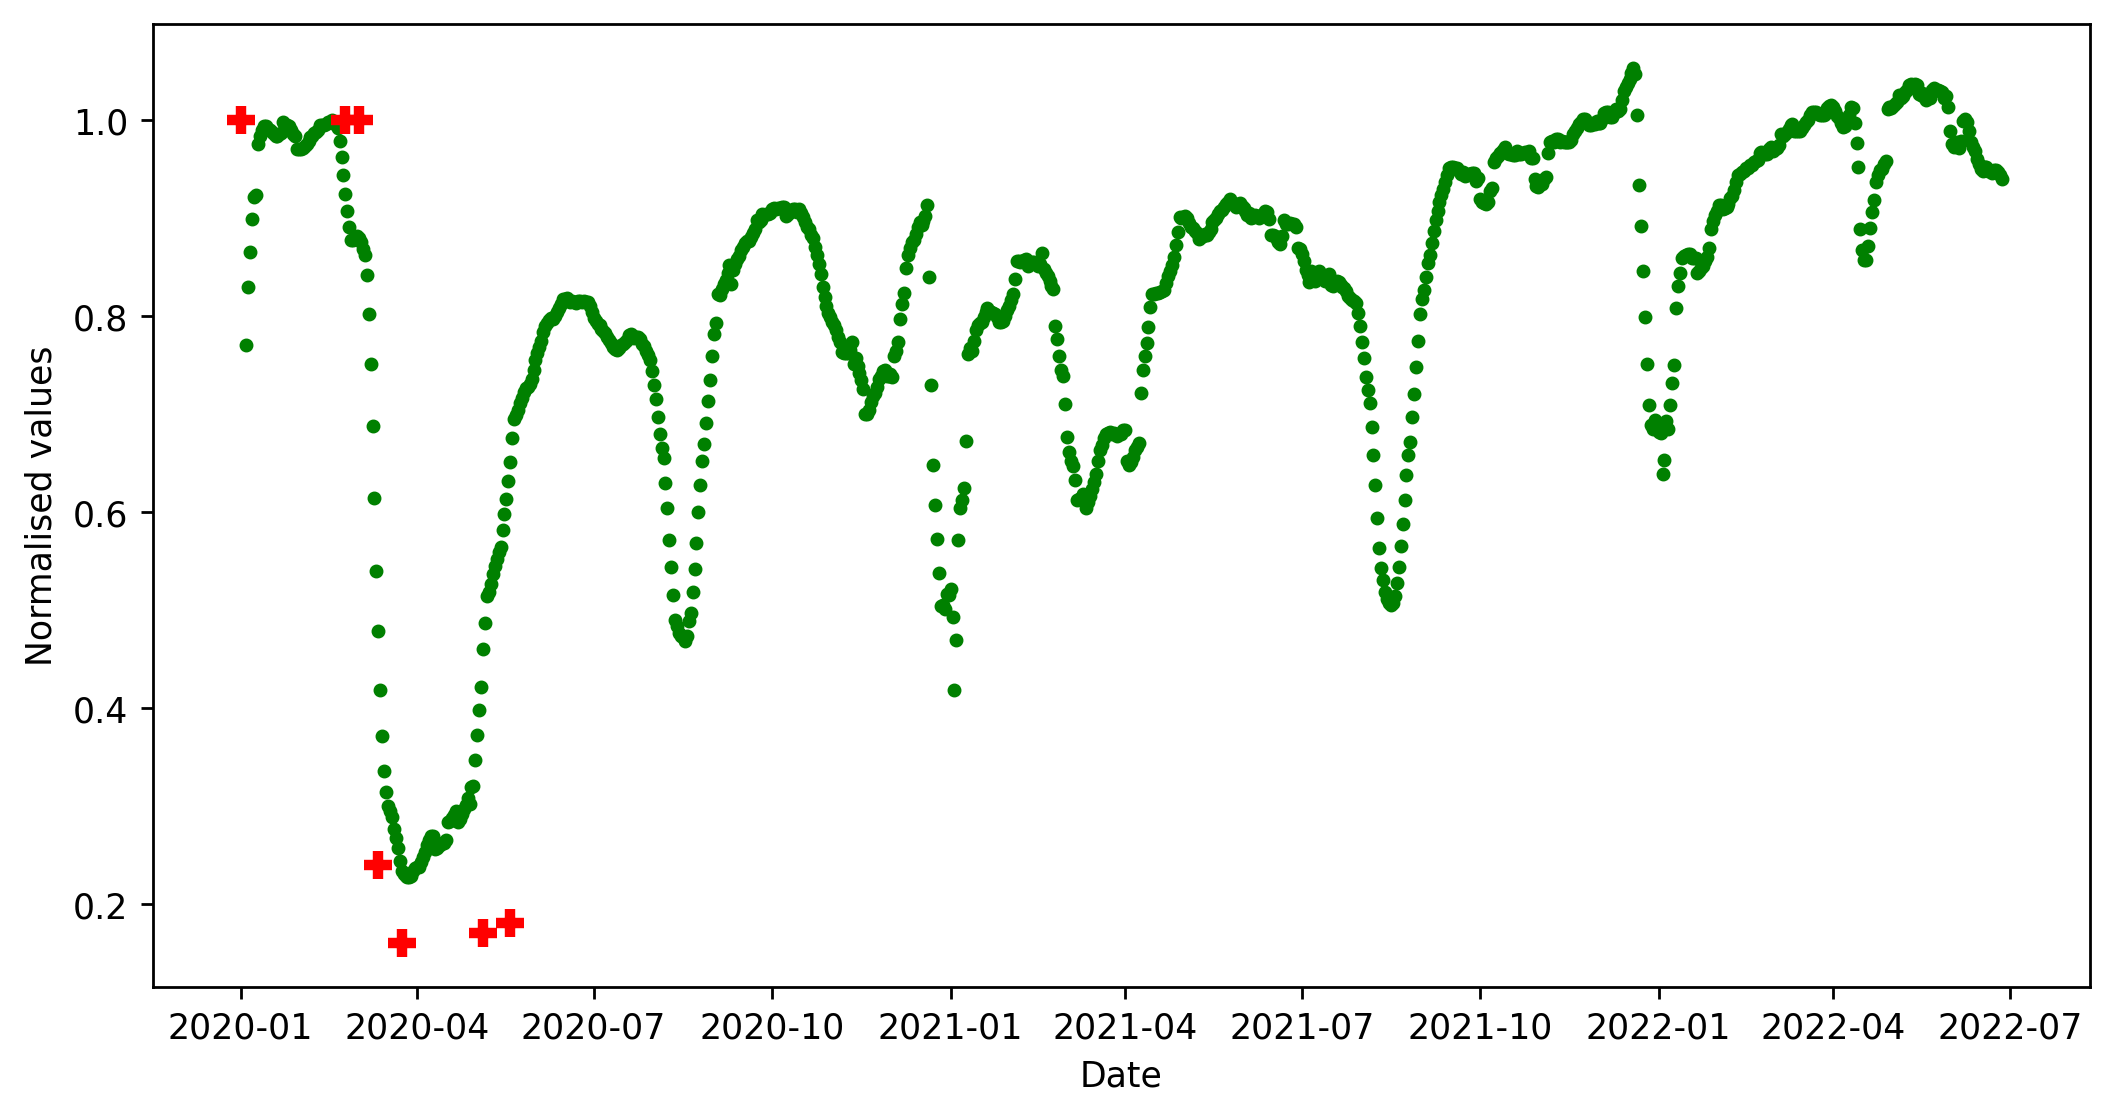

In [7]:
# Plot m_norm and shifted_sociality over time using matplotlib
fig, ax = plt.subplots(figsize=(10,5),dpi=250)
# Plot green dots for m_norm column
ax.plot(df.index, df['m_norm'], 'go', label='Mobility',markersize=3)
# Plot red crosses for shifted_sociality column
ax.plot(df.index[df.index < "2020-06-01"], df['sociality'][df.index < "2020-06-01"], 'r+', label='Sociability',ms=8,mew=3)

ax.set_xlabel('Date')
ax.set_ylabel('Normalised values')
fig.savefig('images/mob_socia_noshift_0.pdf', transparent = True, bbox_inches='tight',dpi=300)



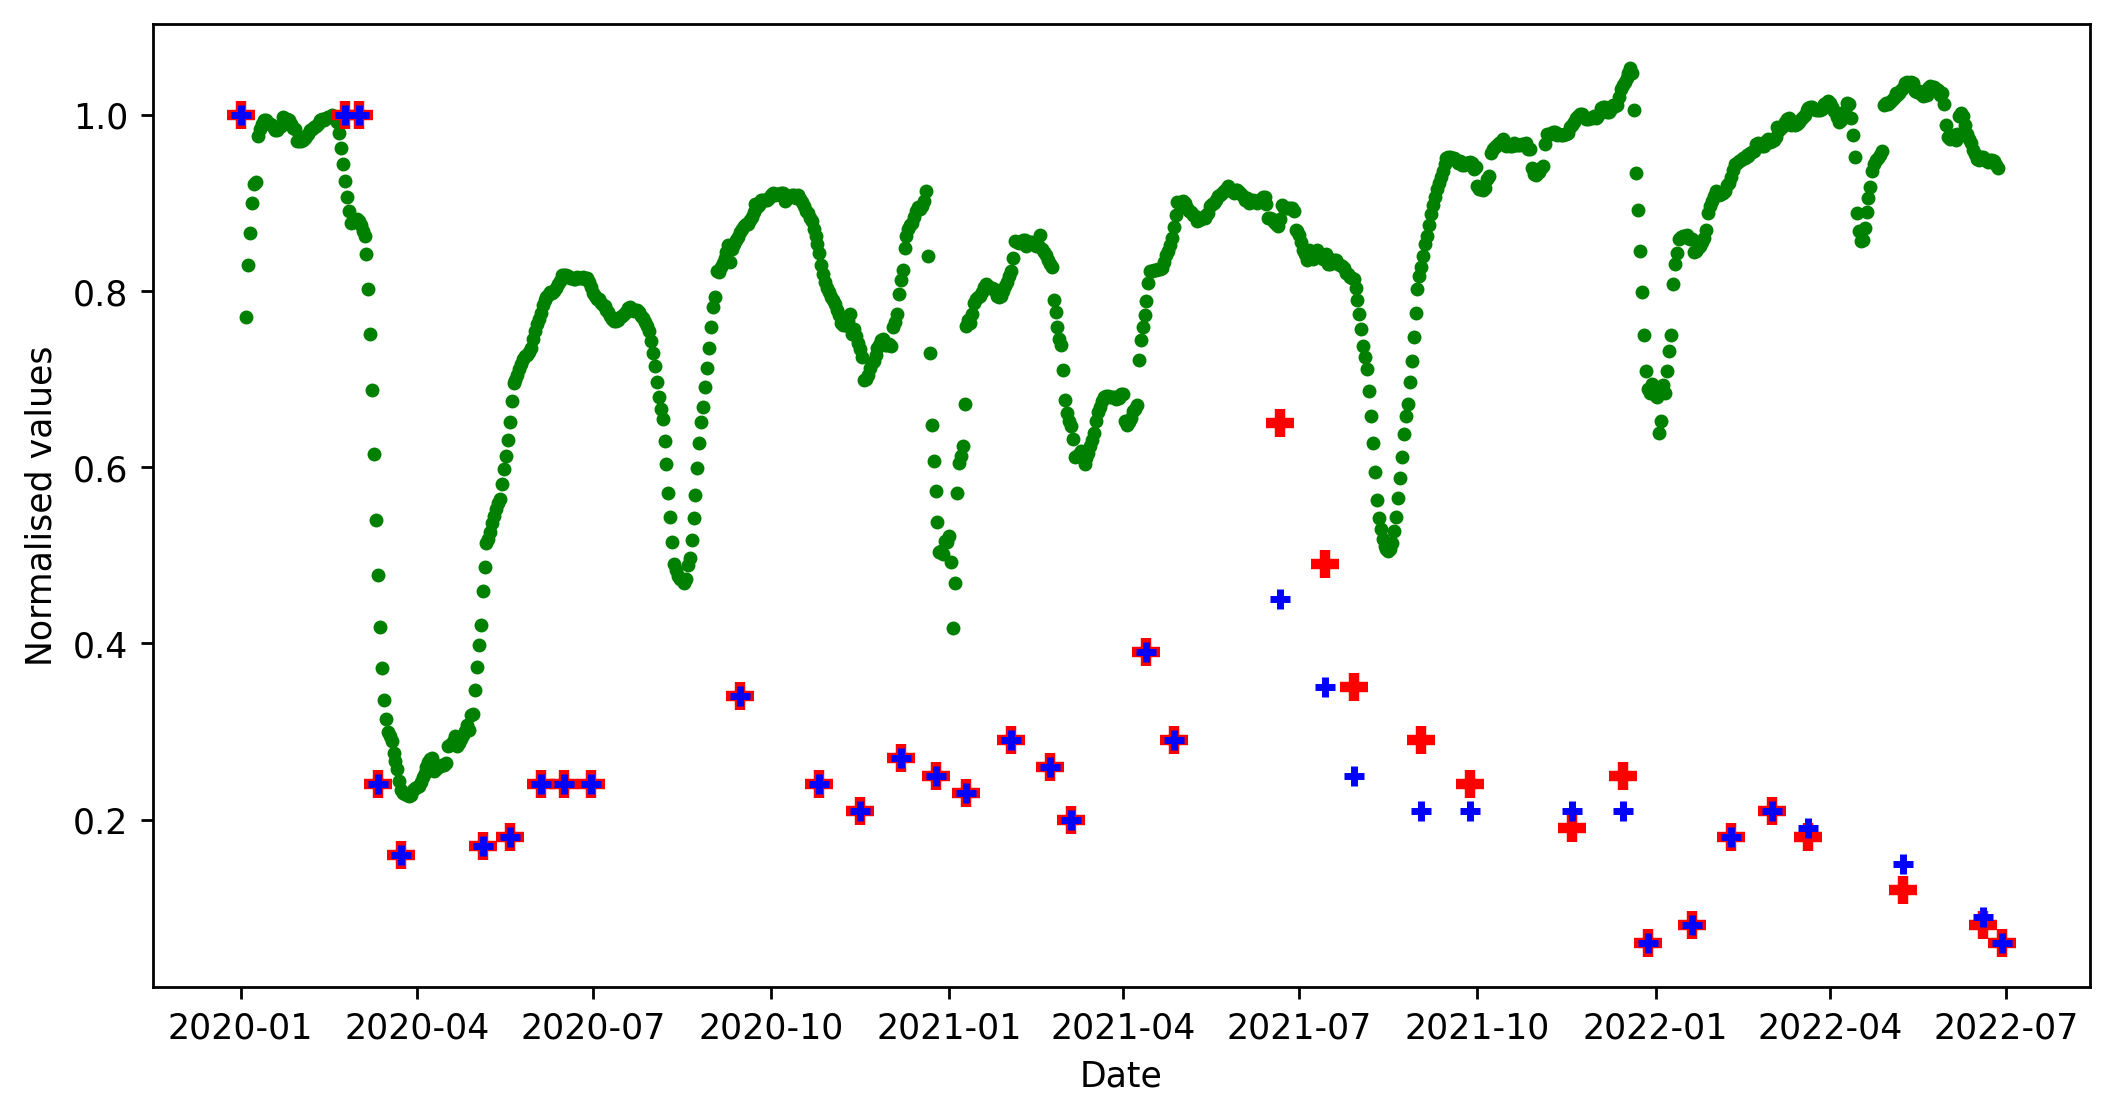

In [34]:
# Plot m_norm and shifted_sociality over time using matplotlib
fig, ax = plt.subplots(figsize=(10,5),dpi=250)
# Plot green dots for m_norm column
ax.plot(df.index, df['m_norm'], 'go', label='Mobility',markersize=3)
# Plot red crosses for shifted_sociality column
ax.plot(df.index, df['sociality'], 'r+', label='Sociability',ms=8,mew=3)
ax.plot(df.index, df['sociality75pc'], 'b+', label='Sociability',ms=6,mew=2)

ax.set_xlabel('Date')
ax.set_ylabel('Normalised values')
fig.savefig('images/mob_socia_noshift.pdf', transparent = True, bbox_inches='tight',dpi=300)



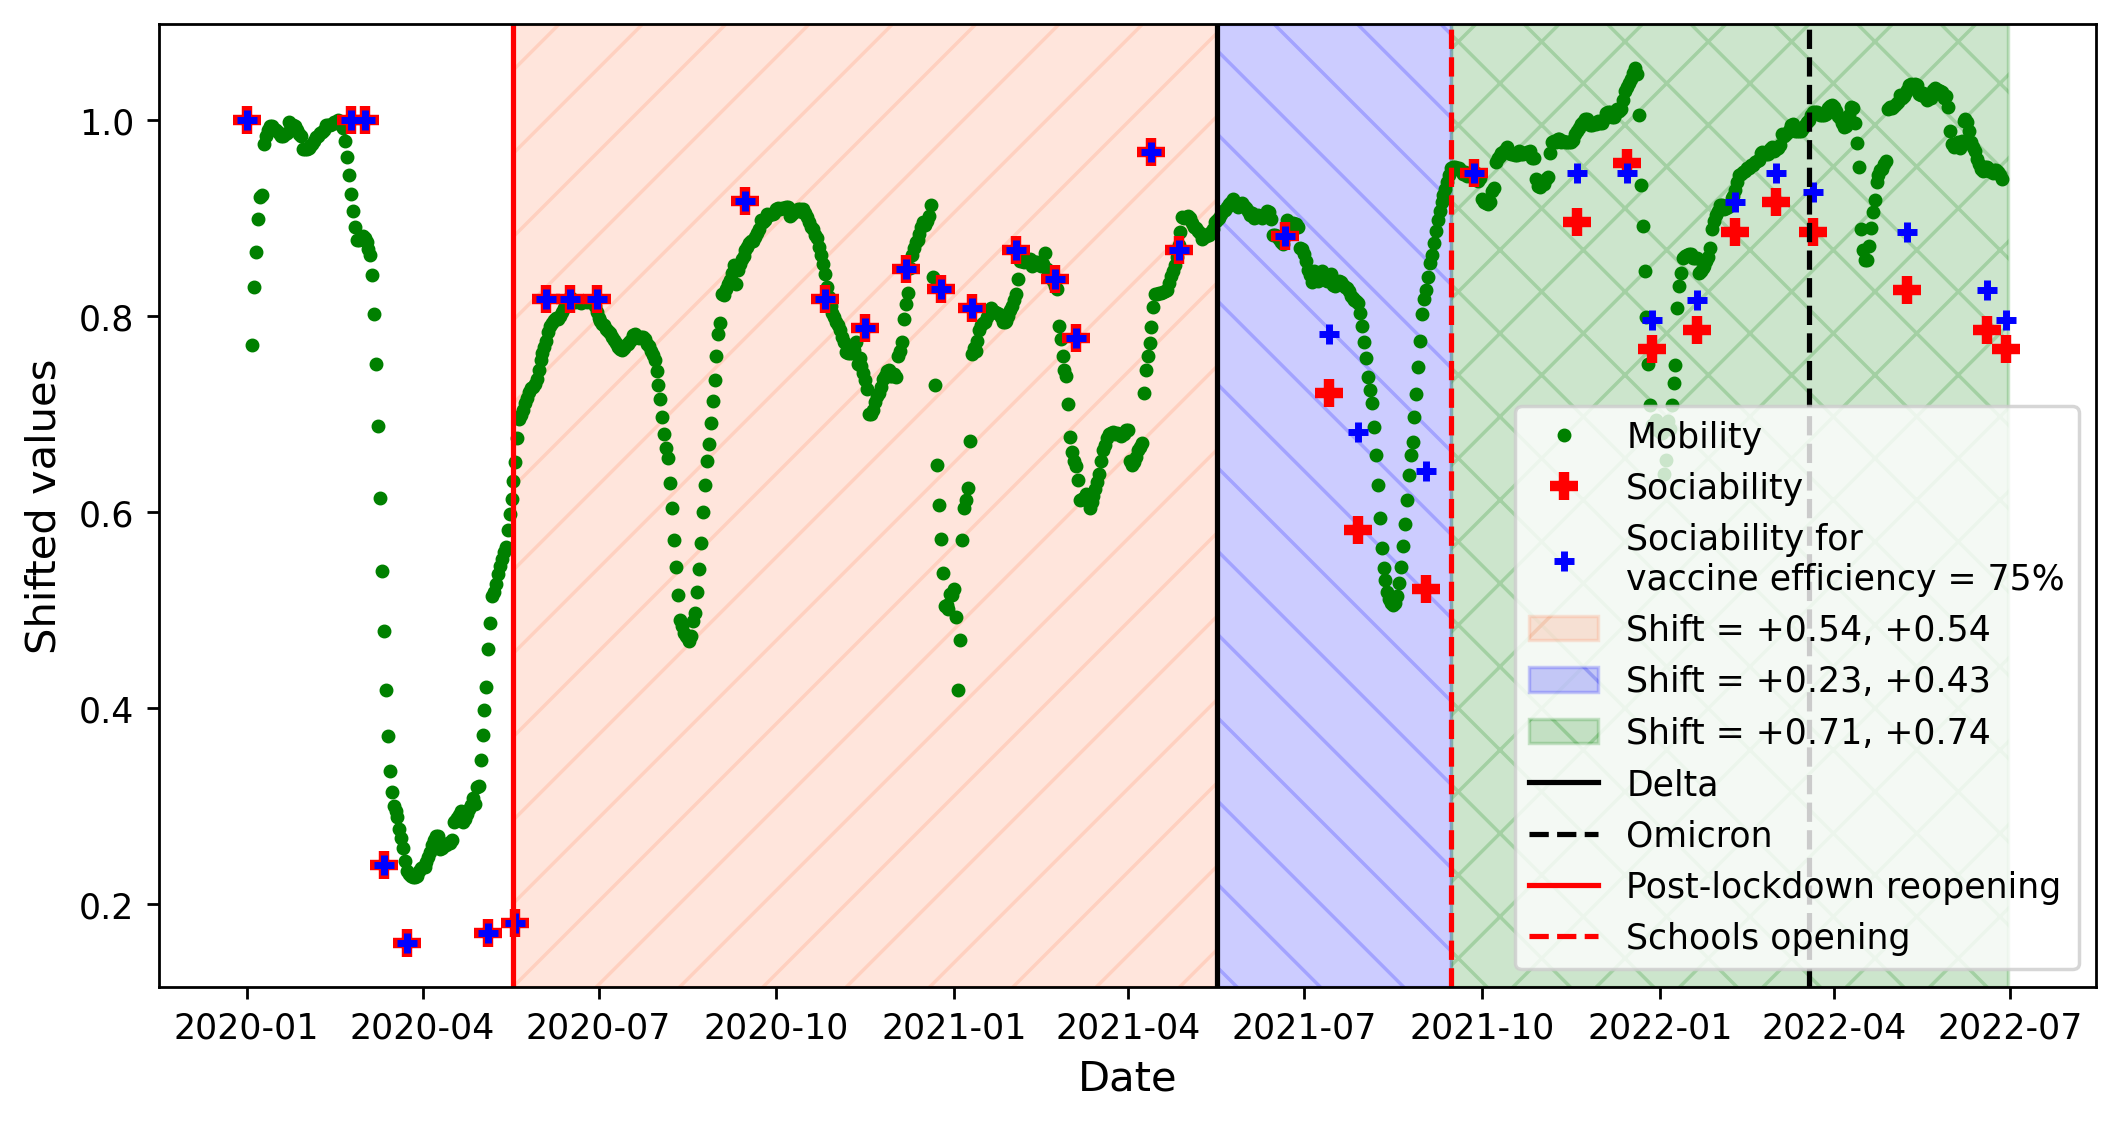

In [32]:

# Plot m_norm and shifted_sociality over time using matplotlib
fig, ax = plt.subplots(figsize=(10,5),dpi=250)
# Plot green dots for m_norm column
ax.plot(df.index, df['m_norm'], 'go', label='Mobility',markersize=3)
# Plot red crosses for shifted_sociality column
ax.plot(df.index, df['shifted_sociality'], 'r+', label='Sociability',ms=8,mew=3)
ax.plot(df.index, df['shifted_sociality75pc'], 'b+', label = 'Sociability for\nvaccine efficiency = 75%', ms = 6, mew=2)

# Draw a different area for each period except the first one
ax.axvspan(bps[1],bps[2],alpha=0.2,color='coral',hatch='/',label=f'Shift = +{df_shifts.iloc[1]:.2f}, +{df_shifts75pc.iloc[1]:.2f}')
ax.axvspan(bps[2],bps[3],alpha=0.2,color='blue',hatch='\\',label=f'Shift = +{df_shifts.iloc[2]:.2f}, +{df_shifts75pc.iloc[2]:.2f}')
ax.axvspan(bps[3],bps[4],alpha=0.2,color='green',hatch='x',label=f'Shift = +{df_shifts.iloc[3]:.2f}, +{df_shifts75pc.iloc[3]:.2f}')

ax.axvline(pd.to_datetime('2021-05-17'),label='Delta',color='black')
ax.axvline(pd.to_datetime('2022-03-19'),label='Omicron',color='black',linestyle='--')
#ax.axvline(pd.to_datetime('2021-09-01'),label='60% vaccinated',color='black',linestyle='--')
ax.axvline(pd.to_datetime('2020-05-18'),label='Post-lockdown reopening',color='red')
ax.axvline(pd.to_datetime('2021-09-15'),label='Schools opening',color='red',linestyle='--')
ax.legend(loc='lower right',fontsize=10)


ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Shifted values', fontsize = 12)
# Rotate x-axis labels and show only every 10th label
plt.xticks(rotation=0, fontsize = 10)
#ax.xaxis.set_ticks(df.index[::90])
#ax.xaxis.set_ticklabels(df.index[::90])
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
plt.savefig('images/mob_socia_shift.pdf',bbox_inches='tight',dpi=300, transparent = True)
plt.show()

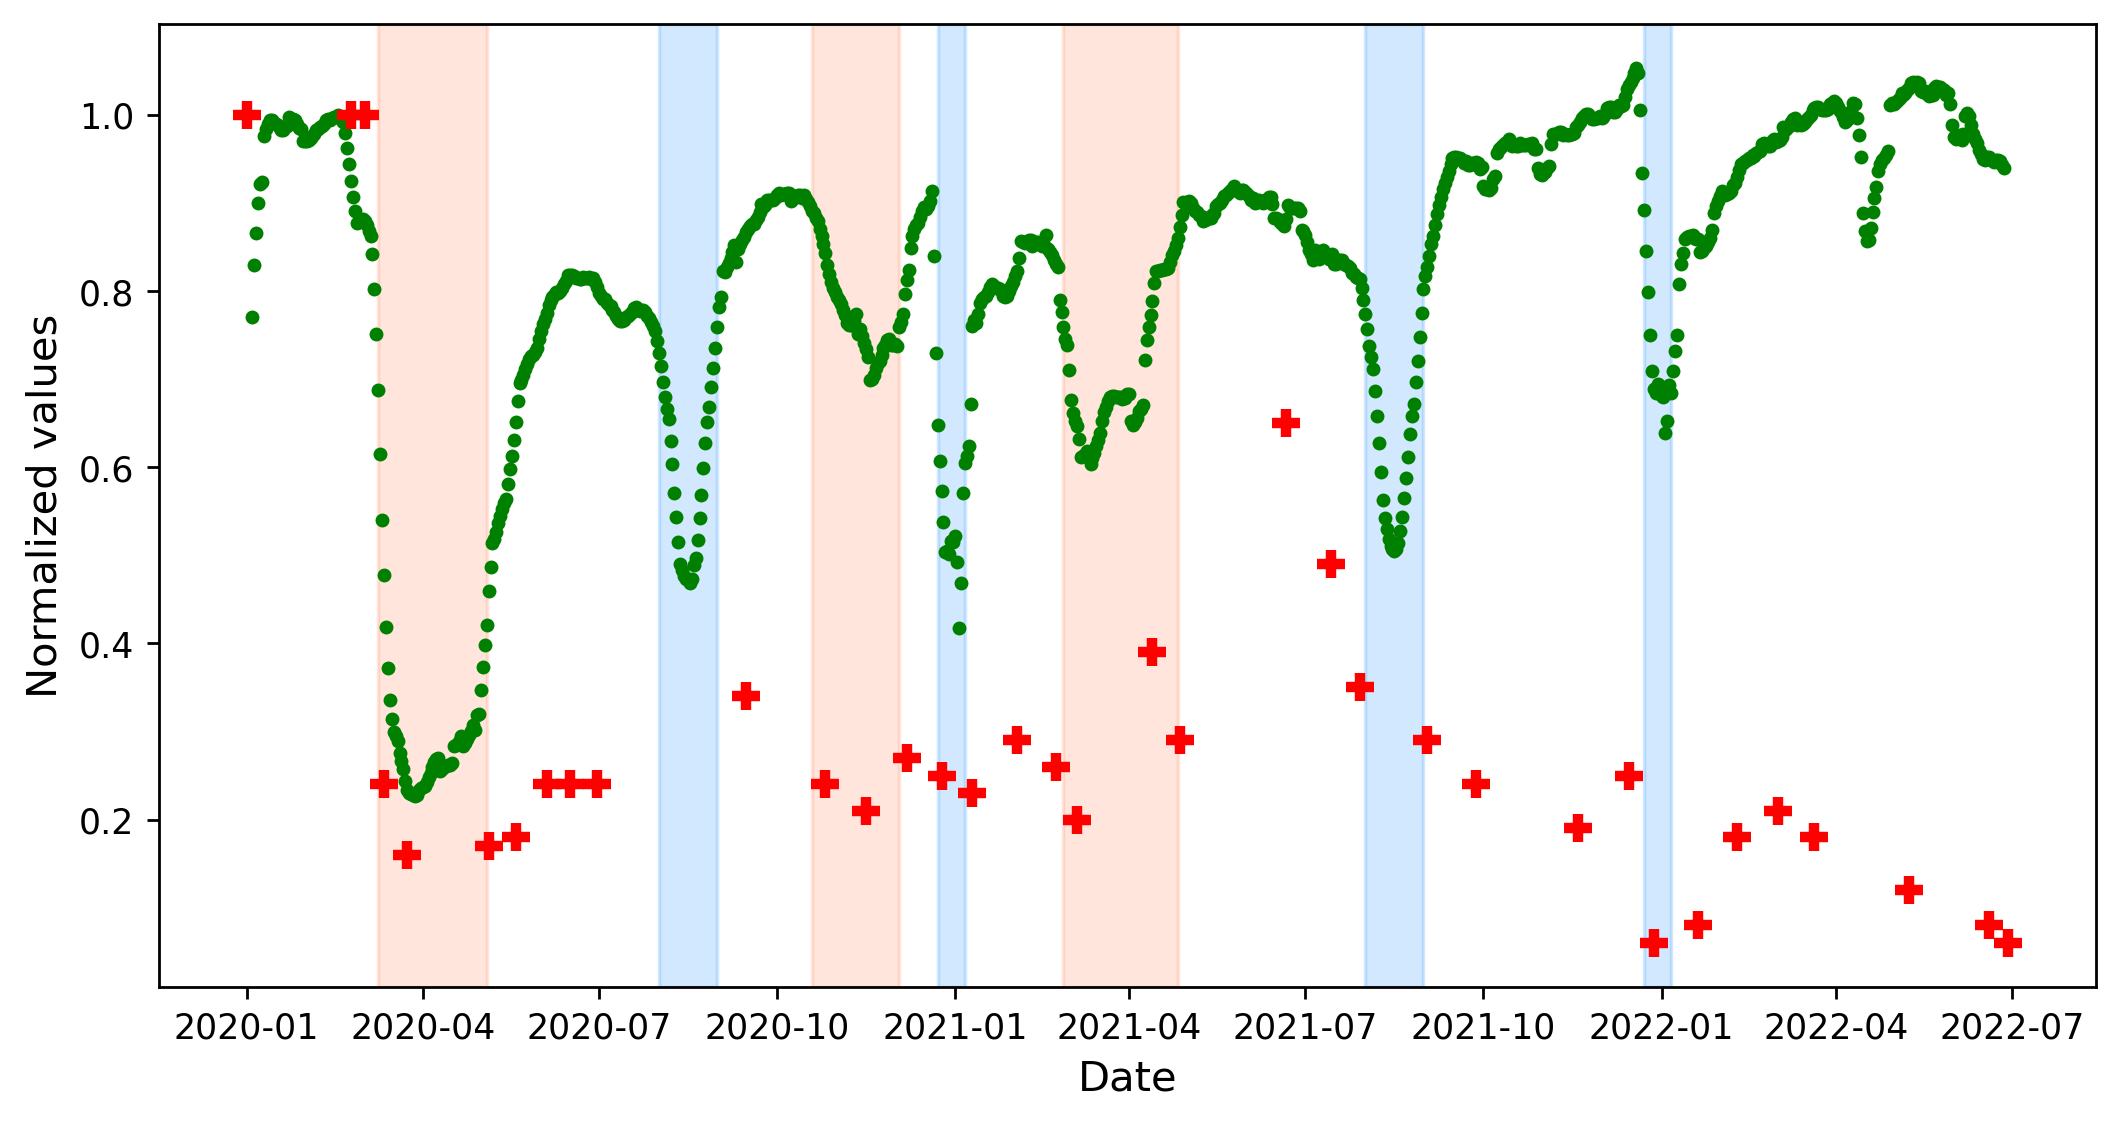

In [10]:

# Plot m_norm and shifted_sociality over time using matplotlib
fig, ax = plt.subplots(figsize=(10,5),dpi=250)
# Plot green dots for m_norm column
ax.plot(df.index, df['m_norm'], 'go', label='Mobility',markersize=3)
# Plot red crosses for shifted_sociality column
ax.plot(df.index, df['sociality'], 'r+', label='Sociability',ms=8,mew=3)

# Draw a different area for each period except the first one
ax.axvspan(pd.to_datetime('2020-03-09'),pd.to_datetime('2020-05-04'),alpha=0.2,color='coral')
ax.axvspan(pd.to_datetime('2020-10-19'),pd.to_datetime('2020-12-03'),alpha=0.2,color='coral')
ax.axvspan(pd.to_datetime('2021-02-26'),pd.to_datetime('2021-04-26'),alpha=0.2,color='coral')

ax.axvspan(pd.to_datetime('2020-08-01'),pd.to_datetime('2020-08-31'),alpha=0.2,color='dodgerblue')
ax.axvspan(pd.to_datetime('2020-12-23'),pd.to_datetime('2021-01-06'),alpha=0.2,color='dodgerblue')
ax.axvspan(pd.to_datetime('2021-08-01'),pd.to_datetime('2021-08-31'),alpha=0.2,color='dodgerblue')
ax.axvspan(pd.to_datetime('2021-12-23'),pd.to_datetime('2022-01-06'),alpha=0.2,color='dodgerblue')

#ax.legend(loc='lower right',fontsize=8)


ax.set_xlabel('Date', fontsize = 12)
ax.set_ylabel('Normalized values', fontsize = 12)
# Rotate x-axis labels and show only every 10th label
plt.xticks(rotation=0, fontsize = 10)
#ax.xaxis.set_ticks(df.index[::60])
#ax.xaxis.set_ticklabels(df.index[::60])
myFmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(myFmt)
plt.savefig('images/mob_socia_norm.pdf',bbox_inches='tight',dpi=300, transparent = True)
plt.show()

In [11]:
df.dropna()

,mobility,m_smoothed,m_norm,sociality,sociality75pc,shifted_sociality,shifted_sociality75pc,Period,shift
2020-02-24,202402.666667,200842.398810,0.924852,1.00,1.00,1.000000,1.000000,1,0.000000
2020-03-02,202848.208333,190918.666667,0.879155,1.00,1.00,1.000000,1.000000,1,0.000000
2020-03-12,105331.791667,103805.726190,0.478011,0.24,0.24,0.240000,0.240000,1,0.000000
2020-03-24,60692.416667,50753.315476,0.233712,0.16,0.16,0.160000,0.160000,1,0.000000
2020-05-05,120410.291667,99872.380952,0.459899,0.17,0.17,0.170000,0.170000,1,0.000000
2020-05-19,157648.041667,141379.523810,0.651034,0.18,0.18,0.180000,0.180000,2,0.000000
2020-06-04,184847.083333,168270.952381,0.774865,0.24,0.24,0.817593,0.817593,2,0.577593
2020-06-16,189940.000000,177549.857143,0.817593,0.24,0.24,0.817593,0.817593,2,0.577593
2020-06-30,187782.416667,174700.678571,0.804473,0.24,0.24,0.817593,0.817593,2,0.577593
2020-09-15,202473.958333,188330.946429,0.867239,0.34,0.34,0.917593,0.917593,2,0.577593


In [12]:
# Make a df removing nans from m_norm and shifted_sociality
temp=df.dropna(subset=['m_norm','shifted_sociality'])
# Compute correlation between m_norm and shifted_sociality, using scipy pearsonr
print('Pearson correlation coefficient and p-value:')
print(stats.pearsonr(temp['m_norm'],temp['shifted_sociality']))
print(stats.kendalltau(temp['m_norm'],temp['shifted_sociality']))
# Show RMSE
print(f'RMSE {((temp["m_norm"]-temp["shifted_sociality"])**2).mean()**0.5}')

# Compute correlation between m_norm and shifted_sociality for each period, using scipy pearsonr
print()
for period in df['Period'].drop_duplicates(keep='first'):
    # Create a temp df with only the current period and remove row with nan in shifted_sociality
    temp=df[df['Period']==period].dropna(subset=['m_norm','shifted_sociality'])
    print(f'Period {period}: Pearson {stats.pearsonr(temp["m_norm"],temp["shifted_sociality"])}')
    print(f'Period {period}: Kendall {stats.kendalltau(temp["m_norm"],temp["shifted_sociality"])}')
    # Show RMSE
    print(f'Period {period}: RMSE {((temp["m_norm"]-temp["shifted_sociality"])**2).mean()**0.5}')
    # Make a scatter plot for each period in a new figure
    #plt.figure()
    #plt.title(f'Period {period}')
    #plt.scatter(temp['m_norm'],temp['shifted_sociality'])
    #plt.xlabel('Mobility')
    #plt.ylabel('Sociality')
    #plt.show()
    

Pearson correlation coefficient and p-value:
(0.7743757549665485, 7.722460867221052e-08)
KendalltauResult(correlation=0.50541612050761, pvalue=3.0262941796450976e-05)
RMSE 0.15259612020793656

Period 1: Pearson (0.9566357779469179, 0.010769261922921004)
Period 1: Kendall KendalltauResult(correlation=0.9486832980505137, pvalue=0.022977401503206086)
Period 1: RMSE 0.1824143818955875
Period 2: Pearson (0.47750096635492434, 0.07185596175287581)
Period 2: Kendall KendalltauResult(correlation=0.4929039709588245, pvalue=0.012273657654651824)
Period 2: RMSE 0.15267093427820014
Period 3: Pearson (0.9183008396141243, 0.08169916038587566)
Period 3: Kendall KendalltauResult(correlation=0.6666666666666669, pvalue=0.3333333333333333)
Period 3: RMSE 0.20045542820893006
Period 4: Pearson (0.6258108866754521, 0.052941510224502476)
Period 4: Kendall KendalltauResult(correlation=0.38646345903326834, pvalue=0.12531568180831731)
Period 4: RMSE 0.10722817711748375


In [13]:
df.columns

Index(['mobility', 'm_smoothed', 'm_norm', 'sociality', 'sociality75pc',
       'shifted_sociality', 'shifted_sociality75pc', 'Period', 'shift'],
      dtype='object')

In [14]:
# Make a df removing nans from m_norm and shifted_sociality
temp=df.dropna(subset=['m_norm','sociality'])
# Compute correlation between m_norm and shifted_sociality, using scipy pearsonr
print('Pearson correlation coefficient and p-value:')
print(stats.pearsonr(temp['m_norm'],temp['sociality']))
print(stats.kendalltau(temp['m_norm'],temp['sociality']))
# Show RMSE
print(f'RMSE {((temp["m_norm"]-temp["sociality"])**2).mean()**0.5}')

# Compute correlation between m_norm and shifted_sociality for each period, using scipy pearsonr
print()
for period in df['Period'].drop_duplicates(keep='first'):
    # Create a temp df with only the current period and remove row with nan in shifted_sociality
    temp=df[df['Period']==period].dropna(subset=['m_norm','sociality'])
    print(f'Period {period}: Pearson {stats.pearsonr(temp["m_norm"],temp["sociality"])}')
    print(f'Period {period}: Kendall {stats.kendalltau(temp["m_norm"],temp["sociality"])}')
    # Show RMSE
    print(f'Period {period}: RMSE {((temp["m_norm"]-temp["sociality"])**2).mean()**0.5}')
    # Make a scatter plot for each period in a new figure
    #plt.figure()
    #plt.title(f'Period {period}')
    #plt.scatter(temp['m_norm'],temp['sociality'])
    #plt.xlabel('Mobility')
    #plt.ylabel('Sociality')
    #plt.show()
    

Pearson correlation coefficient and p-value:
(0.17827209484172746, 0.3131069569544059)
KendalltauResult(correlation=0.11671217124877975, pvalue=0.34062708726592306)
RMSE 0.5706869740940815

Period 1: Pearson (0.9566357779469179, 0.010769261922921004)
Period 1: Kendall KendalltauResult(correlation=0.9486832980505137, pvalue=0.022977401503206086)
Period 1: RMSE 0.1824143818955875
Period 2: Pearson (0.5046754119831284, 0.05503344050222516)
Period 2: Kendall KendalltauResult(correlation=0.4929039709588245, pvalue=0.012273657654651824)
Period 2: RMSE 0.5204276094698906
Period 3: Pearson (0.9183008396141242, 0.08169916038587577)
Period 3: Kendall KendalltauResult(correlation=0.6666666666666669, pvalue=0.3333333333333333)
Period 3: RMSE 0.41158431838740395
Period 4: Pearson (0.6258108866754519, 0.05294151022450259)
Period 4: Kendall KendalltauResult(correlation=0.38646345903326834, pvalue=0.12531568180831731)
Period 4: RMSE 0.7852762617679705


# Null breakpoint model

In [15]:
# Sample 100 sets of 3 indexes from the df

nbps=500
rmses=[]
prs=[]
pvals=[]
for j in range(nbps):
    rbps=list(bps[:1])+sorted(df.iloc[1:-1,:].sample(3).index)+list(bps[-1:])
    #print(rbps)
    df_test=df.copy()
    df_test['sociality']=df_test['sociality'].fillna(method='bfill')
    df_test['m_norm']=df_test['m_norm'].fillna(method='bfill')

    df_test['NPeriod']=pd.cut(df_test.index,bins=rbps,labels=['1','2','3','4'],include_lowest=True)
    temp=df_test.drop_duplicates(subset=['NPeriod'],keep='first')
    temp_shifts=temp['m_norm']-temp['sociality']
    #print(temp_shifts)
    df_test['shifted_sociality']=df_test['sociality']
    for i in range(2,len(bps)):
        df_test.loc[df_test['NPeriod']==str(i),'shifted_sociality']=df_test.loc[df_test['NPeriod']==str(i),'sociality']+temp_shifts.iloc[i-1]

    df_test.dropna(subset=['m_norm','shifted_sociality'],inplace=True)
    # Compute correlation between m_norm and shifted_sociality, using scipy pearsonr
    #print('Pearson correlation coefficient and p-value:')
    #print(stats.pearsonr(df_test['m_norm'],df_test['shifted_sociality']))
    #print(stats.kendalltau(df_test['m_norm'],df_test['shifted_sociality']))
    # Show RMSE
    #print(f'RMSE {((df_test["m_norm"]-df_test["shifted_sociality"])**2).mean()**0.5}')
    p,v=stats.pearsonr(df_test['m_norm'],df_test['shifted_sociality'])
    prs.append(p)
    pvals.append(v)
    rmses.append(((df_test["m_norm"]-df_test["shifted_sociality"])**2).mean()**0.5)

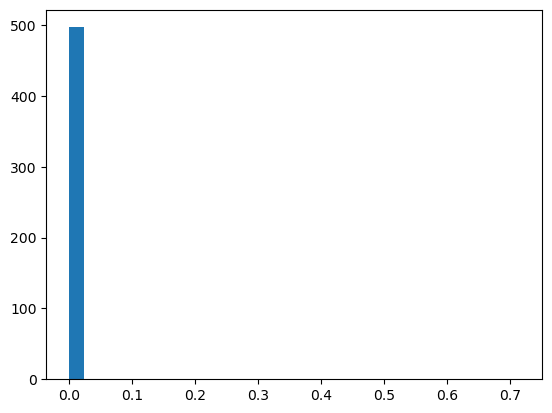

In [16]:
plt.hist(pvals,30)
plt.show()

In [17]:
# Print max, mean and dev st of prs
print(f'Max: {max(prs)}')
print(f'Mean: {sum(prs)/len(prs)}')
print(f'Dev st: {((sum([(x-sum(prs)/len(prs))**2 for x in prs])/len(prs))**0.5)}')


Max: 0.7720410412526921
Mean: 0.48880442859247764
Dev st: 0.1580423253716669


In [18]:
# Print min, mean and dev st of RMSEs
print(f'Min: {min(rmses)}')
print(f'Mean: {sum(rmses)/len(rmses)}')
print(f'Dev st: {((sum([(x-sum(rmses)/len(rmses))**2 for x in rmses])/len(rmses))**0.5)}')


Min: 0.14856432862735527
Mean: 0.3204516290094227
Dev st: 0.0713065448770801


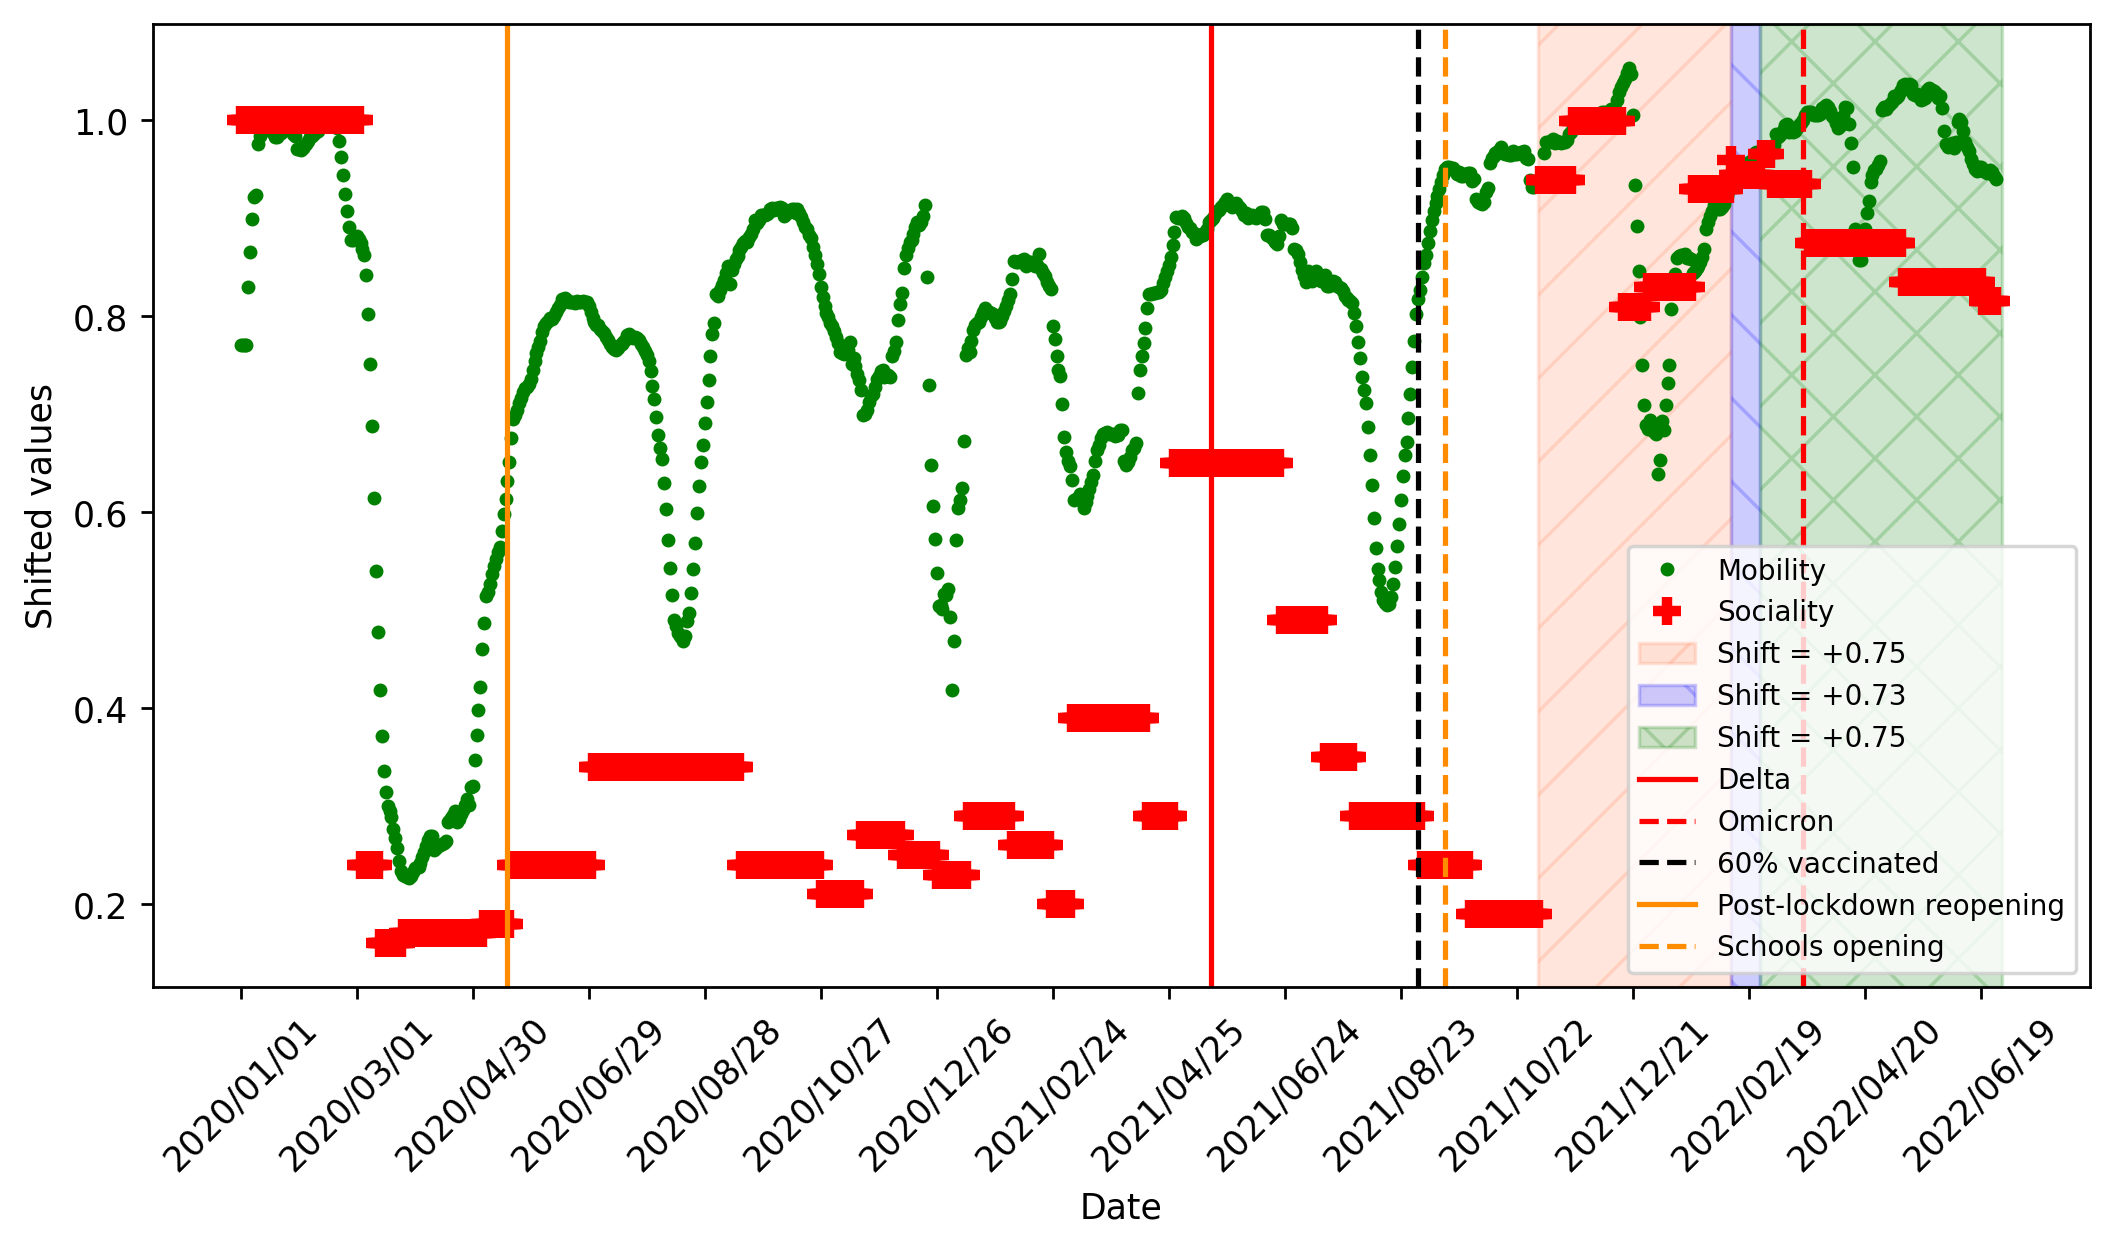

In [19]:

# Plot m_norm and shifted_sociality over time using matplotlib
fig, ax = plt.subplots(figsize=(10,5),dpi=250)
# Plot green dots for m_norm column
ax.plot(df_test.index, df_test['m_norm'], 'go', label='Mobility',markersize=3)
# Plot red crosses for shifted_sociality column
ax.plot(df_test.index, df_test['shifted_sociality'], 'r+', label='Sociality',ms=8,mew=3)

# Draw a different area for each period except the first one
ax.axvspan(rbps[1],rbps[2],alpha=0.2,color='coral',hatch='/',label=f'Shift = +{temp_shifts.iloc[1]:.2f}')
ax.axvspan(rbps[2],rbps[3],alpha=0.2,color='blue',hatch='\\',label=f'Shift = +{temp_shifts.iloc[2]:.2f}')
ax.axvspan(rbps[3],rbps[4],alpha=0.2,color='green',hatch='x',label=f'Shift = +{temp_shifts.iloc[3]:.2f}')

ax.axvline(pd.to_datetime('2021-05-17'),label='Delta',color='red')
ax.axvline(pd.to_datetime('2022-03-19'),label='Omicron',color='red',linestyle='--')
ax.axvline(pd.to_datetime('2021-09-01'),label='60% vaccinated',color='black',linestyle='--')
ax.axvline(pd.to_datetime('2020-05-18'),label='Post-lockdown reopening',color='darkorange')
ax.axvline(pd.to_datetime('2021-09-15'),label='Schools opening',color='darkorange',linestyle='--')
ax.legend(loc='lower right',fontsize=8)


ax.set_xlabel('Date')
ax.set_ylabel('Shifted values')
# Rotate x-axis labels and show only every 10th label
plt.xticks(rotation=45)
ax.xaxis.set_ticks(df_test.index[::60])
ax.xaxis.set_ticklabels(df_test.index[::60])
myFmt = mdates.DateFormatter('%Y/%m/%d')
ax.xaxis.set_major_formatter(myFmt)
plt.savefig('images/mob_socia_shift.pdf',bbox_inches='tight',dpi=300)
plt.show()